In [1]:
import os
os.chdir('D:\\Personnel Development\\IPBA\\05 GLM Statistical modelling with Python\\Module 01 Predictive analytics - Linear regression model\\1. Linear Regression in Python Demo Part 1')

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("mktmix.csv")

In [4]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


In [5]:
data.shape


(104, 9)

In [6]:
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
count,104.00,104.00,100.00,104.00,104.00,104.00,104.00
mean,20171.07,15.31,256.69,32.92,0.02,141.01,2.55
std,1578.60,0.53,86.99,13.68,0.03,42.95,0.31
min,17431.00,13.74,0.00,10.78,0.00,37.66,1.82
25%,19048.75,15.03,235.00,22.18,0.00,117.11,2.32
50%,19943.50,15.33,278.50,31.16,0.00,138.58,2.50
75%,20942.75,15.64,313.25,41.08,0.05,175.68,2.81
max,24944.00,16.28,399.00,68.12,0.09,240.29,3.16


In [7]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign '],
      dtype='object')

In [8]:
data.dtypes

NewVolSales            int64
Base_Price           float64
Radio                float64
InStore              float64
NewspaperInserts      object
Discount             float64
TV                   float64
Stout                float64
Website_Campaign      object
dtype: object

In [9]:
print(data["Base_Price"].describe())

count   104.00
mean     15.31
std       0.53
min      13.74
25%      15.03
50%      15.33
75%      15.64
max      16.28
Name: Base_Price, dtype: float64


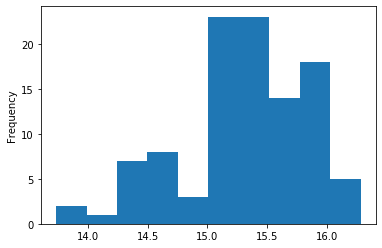

In [10]:
data.Base_Price.plot('hist')

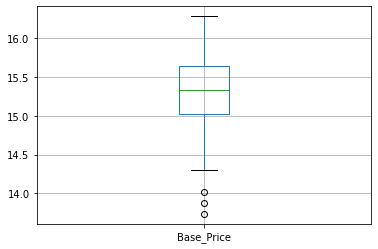

In [11]:
data.boxplot(column='Base_Price')


In [12]:
data['Base_Price'].quantile(np.arange(0,1,0.1))

0.00   13.74
0.10   14.59
0.20   14.97
0.30   15.03
0.40   15.18
0.50   15.33
0.60   15.49
0.70   15.64
0.80   15.80
0.90   15.96
Name: Base_Price, dtype: float64

In [13]:
q = data['Base_Price'].quantile(0.01)

In [14]:
print(q)

13.8779529113


In [15]:
data[data.Base_Price < q]

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
74,24468,13.74,251.00,37.84,NaN,0.05,135.15,2.66,NaN
76,21710,13.87,261.00,34.22,NaN,0.00,148.71,2.98,NaN


In [16]:
avg =data['Base_Price'].mean()

In [17]:
data.loc[(data["Base_Price"]<q), 'Base_Price'] = avg

In [18]:
data['Base_Price'].describe()

count   104.00
mean     15.34
std       0.48
min      14.01
25%      15.03
50%      15.33
75%      15.64
max      16.28
Name: Base_Price, dtype: float64

In [19]:
data['NewVolSales'].describe()

count     104.00
mean    20171.07
std      1578.60
min     17431.00
25%     19048.75
50%     19943.50
75%     20942.75
max     24944.00
Name: NewVolSales, dtype: float64

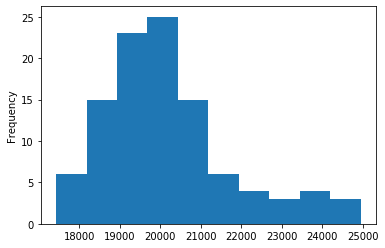

In [20]:
data.NewVolSales.plot('hist')

In [21]:
#new = data.loc[(data["NewVolSales"]>20050.53)]
#nl = list(new.index)
#data.drop(nl,axis = 0)

In [22]:
data['Radio '].describe()

count   100.00
mean    256.69
std      86.99
min       0.00
25%     235.00
50%     278.50
75%     313.25
max     399.00
Name: Radio , dtype: float64

In [23]:
R = data['Radio ']

Rd = DataFrame(R)

In [24]:
type(R)

pandas.core.series.Series

In [25]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(Rd)
X = pd.DataFrame(data = imp.transform(Rd))

In [26]:
data = pd.concat([data,X],axis = 1)

In [27]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign,0
0,19564,15.03,245.00,15.45,NaN,0.00,101.78,2.28,NaN,245.00
1,19387,15.03,314.00,16.39,NaN,0.00,76.73,2.22,NaN,314.00
2,23889,14.59,324.00,62.69,NaN,0.05,131.59,2.01,NaN,324.00
3,20055,15.33,298.00,16.57,NaN,0.00,119.63,2.20,NaN,298.00
4,20064,15.64,279.00,41.50,NaN,0.04,103.44,1.82,NaN,279.00


In [28]:
data.rename(columns={0:"NRadio"}, inplace=True)
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign,NRadio
0,19564,15.03,245.00,15.45,NaN,0.00,101.78,2.28,NaN,245.00
1,19387,15.03,314.00,16.39,NaN,0.00,76.73,2.22,NaN,314.00
2,23889,14.59,324.00,62.69,NaN,0.05,131.59,2.01,NaN,324.00
3,20055,15.33,298.00,16.57,NaN,0.00,119.63,2.20,NaN,298.00
4,20064,15.64,279.00,41.50,NaN,0.04,103.44,1.82,NaN,279.00


In [29]:
#df.drop('Radio', axis=1, inplace=True)

In [30]:
#Another way
data['Radio '].isnull().sum()

4

In [31]:
# Replace Missing values 
data['Radio']=data['Radio '].fillna(data['Radio '].mean())


In [32]:
data['Radio'].describe()

count   104.00
mean    256.69
std      85.29
min       0.00
25%     235.75
50%     276.00
75%     312.25
max     399.00
Name: Radio, dtype: float64

In [33]:
data['Website_Campaign '].value_counts(dropna = False)

NaN                  90
Website Campaign      6
Facebook              4
Twitter               4
Name: Website_Campaign , dtype: int64

In [34]:
#Visualization

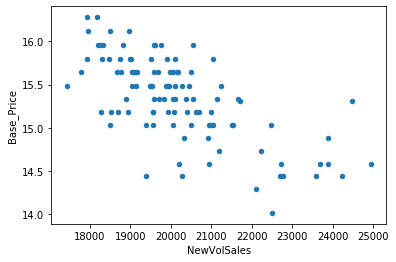

In [35]:
# Base Price
data.plot(x="NewVolSales",y="Base_Price",kind="scatter")

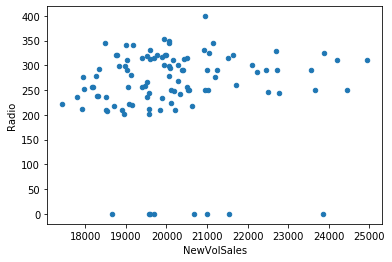

In [36]:
#Radio
data.plot(x="NewVolSales",y="Radio",kind="scatter")

In [37]:
pd.options.display.float_format = '{:.2f}'.format
data.corr()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NRadio,Radio
NewVolSales,1.00,-0.68,0.05,0.44,0.42,0.15,-0.38,0.05,0.05
Base_Price,-0.68,1.00,-0.00,-0.24,-0.20,0.07,0.02,-0.00,-0.00
Radio,0.05,-0.00,1.00,-0.02,0.12,-0.06,-0.19,1.00,1.00
InStore,0.44,-0.24,-0.02,1.00,0.72,-0.02,0.03,-0.02,-0.02
Discount,0.42,-0.20,0.12,0.72,1.00,0.12,-0.03,0.11,0.11
TV,0.15,0.07,-0.06,-0.02,0.12,1.00,-0.13,-0.06,-0.06
Stout,-0.38,0.02,-0.19,0.03,-0.03,-0.13,1.00,-0.19,-0.19
NRadio,0.05,-0.00,1.00,-0.02,0.11,-0.06,-0.19,1.00,1.00
Radio,0.05,-0.00,1.00,-0.02,0.11,-0.06,-0.19,1.00,1.00


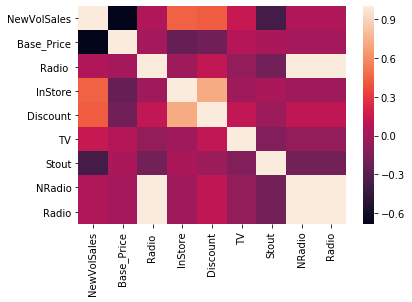

In [38]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [39]:
new = data.corr()
new.to_csv('corr.csv', sep=',')


In [40]:
data.rename(columns={'Website_Campaign ':'Website_Campaign'}, inplace=True)


In [41]:
data.rename(columns={'TV ':"TV"}, inplace=True)

In [42]:
data['log_sales'] = np.log(data.NewVolSales)


In [43]:
def d(x):
    if x < 15:
        return "Low"
    elif 15< x < 15.33:
        return "Medium"
    else:
        return "High"
    

In [44]:
data['BKTPrice']=data['Base_Price'].map(d)

In [45]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign,NRadio,Radio,log_sales,BKTPrice
0,19564,15.03,245.00,15.45,NaN,0.00,101.78,2.28,NaN,245.00,245.00,9.88,Medium
1,19387,15.03,314.00,16.39,NaN,0.00,76.73,2.22,NaN,314.00,314.00,9.87,Medium
2,23889,14.59,324.00,62.69,NaN,0.05,131.59,2.01,NaN,324.00,324.00,10.08,Low
3,20055,15.33,298.00,16.57,NaN,0.00,119.63,2.20,NaN,298.00,298.00,9.91,High
4,20064,15.64,279.00,41.50,NaN,0.04,103.44,1.82,NaN,279.00,279.00,9.91,High


In [46]:
data['BKTPrice'].value_counts()

High      60
Medium    25
Low       19
Name: BKTPrice, dtype: int64

In [47]:
data = pd.get_dummies(data, columns=['NewspaperInserts'])

In [48]:
data = pd.get_dummies(data, columns=['Website_Campaign'])

In [49]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NRadio,Radio,log_sales,BKTPrice,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website Campaign
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,245.00,245.00,9.88,Medium,0,0,0,0
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,314.00,314.00,9.87,Medium,0,0,0,0
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,324.00,324.00,10.08,Low,0,0,0,0
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,298.00,298.00,9.91,High,0,0,0,0
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,279.00,279.00,9.91,High,0,0,0,0


In [50]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'Discount', 'TV',
       'Stout', 'NRadio', 'Radio', 'log_sales', 'BKTPrice',
       'NewspaperInserts_Insert', 'Website_Campaign_Facebook',
       'Website_Campaign_Twitter', 'Website_Campaign_Website Campaign '],
      dtype='object')

In [51]:
data['Online'] = data['Website_Campaign_Facebook']+ data['Website_Campaign_Twitter']+ data['Website_Campaign_Website Campaign ']

In [52]:
data["Offline"]=data['TV']+data['InStore']+ data['Radio']
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'Discount', 'TV',
       'Stout', 'NRadio', 'Radio', 'log_sales', 'BKTPrice',
       'NewspaperInserts_Insert', 'Website_Campaign_Facebook',
       'Website_Campaign_Twitter', 'Website_Campaign_Website Campaign ',
       'Online', 'Offline'],
      dtype='object')

In [53]:
import statsmodels.formula.api as smf

In [54]:
reg=smf.ols("NewVolSales~Base_Price+InStore+TV+Discount+Stout+Radio+Online+NewspaperInserts_Insert",data=data)

In [55]:
results=reg.fit()

In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     30.89
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.89e-23
Time:                        18:34:47   Log-Likelihood:                -846.33
No. Observations:                 104   AIC:                             1711.
Df Residuals:                      95   BIC:                             1734.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5

In [57]:
reg=smf.ols("NewVolSales~Base_Price+InStore+TV+Discount+Stout",data=data)

In [58]:
results=reg.fit()

In [59]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     48.96
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           3.69e-25
Time:                        18:34:47   Log-Likelihood:                -847.84
No. Observations:                 104   AIC:                             1708.
Df Residuals:                      98   BIC:                             1724.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.335e+04   2906.278     18.357      0.0

In [60]:
predictions=results.predict(data)

In [61]:
actuals=data['NewVolSales']

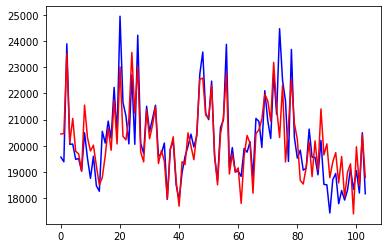

In [62]:
## Actual vs Predicted plot
plt.plot(actuals,"b")
plt.plot(predictions,"r")

In [63]:
residuals = results.resid
type(residuals)

pandas.core.series.Series

In [64]:
residualsdf = DataFrame(residuals)
residualsdf.rename(columns={0:"res"}, inplace=True)

([], <a list of 0 Text xticklabel objects>)

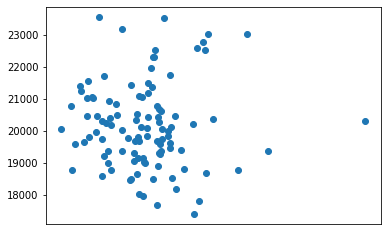

In [65]:
plt.scatter(residualsdf, predictions) 
plt.xticks([])    

In [66]:
import sklearn.metrics as metrics

In [67]:
## Mean Absolute error
mae = metrics.mean_absolute_error(actuals,predictions)
mae

606.1569131697254

In [68]:
np.mean(abs((actuals - predictions)/actuals)) #MAPE

0.0297348018010737

In [69]:
from patsy import dmatrices

In [70]:
y, X = dmatrices('NewVolSales~Base_Price+InStore+TV+Discount+Stout', 
                  data=data, return_type='dataframe')

In [71]:
X.head()

,Intercept,Base_Price,InStore,TV,Discount,Stout
0,1.00,15.03,15.45,101.78,0.00,2.28
1,1.00,15.03,16.39,76.73,0.00,2.22
2,1.00,14.59,62.69,131.59,0.05,2.01
3,1.00,15.33,16.57,119.63,0.00,2.20
4,1.00,15.64,41.50,103.44,0.04,1.82


In [72]:
y.head()

,NewVolSales
0,19564.00
1,19387.00
2,23889.00
3,20055.00
4,20064.00


In [73]:
## VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [75]:
vif.round(1)

,VIF Factor,features
0,1173.20,Intercept
1,1.10,Base_Price
2,2.20,InStore
3,1.10,TV
4,2.20,Discount
5,1.00,Stout


In [76]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=200)

In [78]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [79]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=200)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_advertise_pipeline.py')

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: -1198730.5204882745
Generation 2 - Current best internal CV score: -1198692.153708332
Generation 3 - Current best internal CV score: -1136743.2720536008
Generation 4 - Current best internal CV score: -1136743.2720536008
Generation 5 - Current best internal CV score: -1136743.2720536008

Best pipeline: RidgeCV(PolynomialFeatures(FastICA(input_matrix, tol=0.6000000000000001), degree=2, include_bias=False, interaction_only=False))
-697508.3281471151


C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
predictions = tpot.predict(X_test)

In [81]:
print(type(predictions))
print(len(predictions))

<class 'numpy.ndarray'>
52


In [82]:
predictions=pd.DataFrame(predictions)

In [83]:
print(type(predictions))
print(len(predictions))

<class 'pandas.core.frame.DataFrame'>
52


In [84]:
print(type(y_test))
print(len(y_test))

<class 'pandas.core.frame.DataFrame'>
52


In [85]:
y_test.reset_index(inplace = True) 

In [86]:
y_test

,index,NewVolSales
0,36,17952.00
1,19,20402.00
2,2,23889.00
3,75,22495.00
4,34,19696.00
5,39,18502.00
6,82,19068.00
7,9,19509.00
8,21,21653.00
9,69,22101.00


In [87]:
# Checking the predictions on train and test data
result=pd.concat([y_test,predictions],axis=1)

In [88]:
result.head()

,index,NewVolSales,0
0,36,17952.00,18725.30
1,19,20402.00,20125.48
2,2,23889.00,23261.73
3,75,22495.00,21231.91
4,34,19696.00,19756.39


In [89]:
result.rename(columns={'NewVolSales': 'y_test', 0:"Predictions"}, inplace=True)
result.head()

,index,y_test,Predictions
0,36,17952.00,18725.30
1,19,20402.00,20125.48
2,2,23889.00,23261.73
3,75,22495.00,21231.91
4,34,19696.00,19756.39


In [100]:
y_true=list(result['y_test'])
print(y_true)

[17952.0, 20402.0, 23889.0, 22495.0, 19696.0, 18502.0, 19068.0, 19509.0, 21653.0, 22101.0, 19980.0, 20997.0, 21041.0, 19558.0, 19756.0, 18755.0, 17785.0, 19702.0, 23576.0, 18198.0, 18262.0, 18977.0, 19877.0, 20272.0, 19897.0, 20442.0, 19126.0, 18941.0, 19481.0, 19529.0, 19831.0, 17937.0, 20183.0, 23677.0, 19400.0, 18312.0, 21507.0, 19929.0, 20538.0, 18705.0, 20055.0, 19027.0, 21236.0, 20635.0, 20277.0, 22228.0, 18667.0, 20383.0, 22730.0, 20064.0, 18473.0, 19144.0]


In [101]:
y_pred=list(result['Predictions'])
print(y_pred)

[18725.297583512103, 20125.478873666296, 23261.72731918542, 21231.905553223474, 19756.38713462352, 19216.21233579296, 18965.152802886427, 20447.845441804115, 20474.36229809746, 21366.41832902818, 20734.451561703692, 20999.1868437909, 20450.842378935784, 18089.140801393358, 20539.87550250049, 20200.877215431716, 18715.397269717698, 19122.2061950914, 22611.433603660877, 18694.33631602607, 19022.04625273211, 19678.400637269377, 19835.370589542865, 20009.16824155564, 19825.255416057767, 20090.972843170064, 19631.777274594617, 19200.002210100825, 20011.474056337356, 20539.28605683437, 18878.12058446165, 18605.661791899845, 20655.67931137042, 20609.919096998736, 20156.213684299517, 19528.25747986587, 21432.06247783237, 20075.528562983578, 20482.224828506085, 19461.63750482113, 21188.655911182006, 19599.8112632116, 21088.806456999202, 19819.278138746897, 20120.20279109705, 21197.90752160829, 18971.531850310672, 20839.783326055156, 22774.941672864534, 20695.30143126933, 19673.857670938964, 193

In [112]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [116]:
print('R2 score                 = ', r2_score(y_true, y_pred))                  # indication of goodness of fit
print('Explained Variance score = ', explained_variance_score(y_true, y_pred))  # variation (dispersion) of a given data set accounted by the model
print('Maximum Error            = ', max_error(y_true, y_pred))                 # worst case error between predicted value & true value
print('Mean Absolute Error      = ', mean_absolute_error(y_true, y_pred))       # expected value of the absolute error loss 
print('Mean Squared Error       = ', mean_squared_error(y_true, y_pred))        # expected value of sqaured error
print('Median Absolute Error    = ',median_absolute_error(y_true, y_pred))      # absolute error robust to outliers

R2 score                 =  0.680435793658152
Explained Variance score =  0.6837760057141342
Maximum Error            =  3067.0809030012642
Mean Absolute Error      =  655.1560897347379
Mean Squared Error       =  697508.3281471151
Median Absolute Error    =  629.287056041956
